In [8]:
import torch 
import pandas as pd
from PIL import Image 
from os import listdir
from os.path import isfile, join
import torchvision.transforms as transforms 
import pandas as pd
import matplotlib.pyplot as plt
import math

In [9]:
from fractions import Fraction
path = '../images/images/train/'

train_sыizes = pd.DataFrame({'w' : [], 'h' : []})
propotion = {}
resolution = []
images = []

for file in listdir(path):
    filename = join(path, file)
    if isfile(filename):
        image = Image.open(filename)
        width, height = image.size
        frac = Fraction(width, height)
        if not frac in propotion.keys():
            propotion[frac] = 0
        propotion[frac] += 1
        images.append(image)
        resolution.append(width*height)
        train_sizes.loc[-1] = {'w' : width, 'h' : height}
        train_sizes.index = train_sizes.index + 1
        train_sizes = train_sizes.sort_index()
        image.close()

In [10]:
train_sizes.describe()

,w,h
count,8995.000000,8995.000000
mean,604.765870,520.323291
std,236.934274,209.017945
min,135.000000,101.000000
25%,500.000000,375.000000
50%,500.000000,447.000000
75%,768.000000,683.000000
max,1024.000000,1024.000000


In [19]:
pd.DataFrame(resolution).describe()

,0
count,8.995000e+03
mean,3.506107e+05
std,2.687234e+05
min,1.363500e+04
25%,1.795000e+05
50%,1.875000e+05
75%,6.973440e+05
max,1.048576e+06


In [11]:
propotion

{Fraction(100, 81): 6,
 Fraction(169, 250): 10,
 Fraction(3, 4): 784,
 Fraction(512, 341): 43,
 Fraction(4, 3): 2826,
 Fraction(500, 333): 731,
 Fraction(500, 321): 6,
 Fraction(500, 353): 11,
 Fraction(500, 379): 17,
 Fraction(100, 87): 4,
 Fraction(1, 1): 119,
 Fraction(100, 83): 10,
 Fraction(1024, 997): 2,
 Fraction(500, 357): 40,
 Fraction(250, 163): 9,
 Fraction(500, 347): 7,
 Fraction(307, 500): 1,
 Fraction(1024, 681): 87,
 Fraction(82, 125): 2,
 Fraction(183, 250): 4,
 Fraction(125, 89): 14,
 Fraction(137, 250): 1,
 Fraction(500, 343): 7,
 Fraction(5, 4): 58,
 Fraction(125, 108): 3,
 Fraction(100, 79): 5,
 Fraction(1024, 713): 3,
 Fraction(933, 1024): 1,
 Fraction(250, 167): 100,
 Fraction(187, 250): 15,
 Fraction(333, 500): 219,
 Fraction(683, 1024): 88,
 Fraction(125, 83): 154,
 Fraction(47, 64): 4,
 Fraction(125, 102): 10,
 Fraction(17, 25): 5,
 Fraction(20, 17): 5,
 Fraction(681, 1024): 29,
 Fraction(1024, 819): 9,
 Fraction(1024, 683): 262,
 Fraction(1024, 767): 9,
 Fract

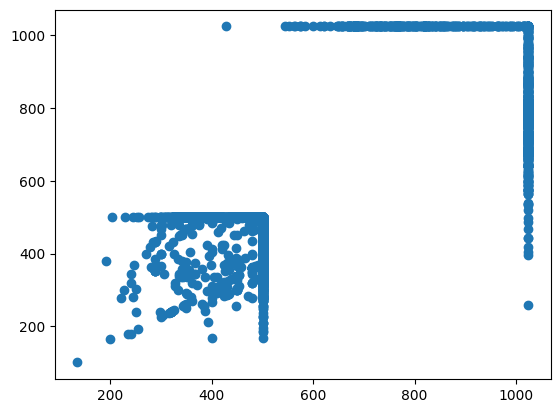

In [12]:
plt.scatter(train_sizes['w'], train_sizes['h'])

(array([7.900e+01, 5.838e+03, 5.350e+02, 2.000e+00, 7.000e+00, 4.600e+01,
        7.980e+02, 1.398e+03, 1.580e+02, 1.340e+02]),
 array([  13635. ,  117129.1,  220623.2,  324117.3,  427611.4,  531105.5,
         634599.6,  738093.7,  841587.8,  945081.9, 1048576. ]),
 <BarContainer object of 10 artists>)

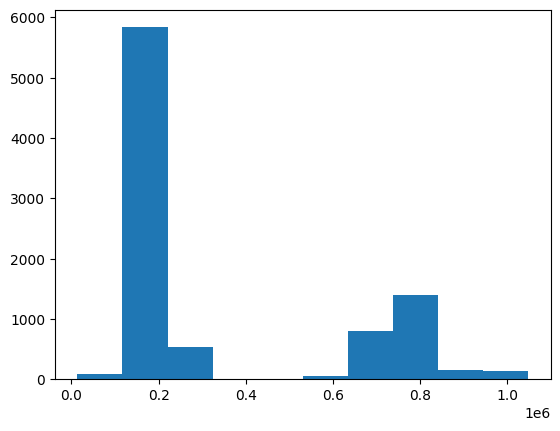

In [18]:
plt.hist(resolution)